In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from time import time
from keras.layers import Conv1D, MaxPool1D, Flatten
from keras.layers import Dropout, Dense, TimeDistributed,LeakyReLU,LSTM,TimeDistributed
from keras.models import Sequential
from keras.utils import to_categorical
from keras import optimizers
from sklearn.metrics import classification_report
from keras.callbacks import TensorBoard

In [3]:
data = pd.read_csv('data.csv')

In [4]:
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [5]:
data = data.drop('Unnamed: 133',1)

In [6]:
x = data.drop('prognosis',1).values
y_ = data.prognosis.values.reshape(-1,1)

In [7]:
np.unique(y_)

array(['(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne',
       'Alcoholic hepatitis', 'Allergy', 'Arthritis', 'Bronchial Asthma',
       'Cervical spondylosis', 'Chicken pox', 'Chronic cholestasis',
       'Common Cold', 'Dengue', 'Diabetes ',
       'Dimorphic hemmorhoids(piles)', 'Drug Reaction',
       'Fungal infection', 'GERD', 'Gastroenteritis', 'Heart attack',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Hypertension ', 'Hyperthyroidism', 'Hypoglycemia',
       'Hypothyroidism', 'Impetigo', 'Jaundice', 'Malaria', 'Migraine',
       'Osteoarthristis', 'Paralysis (brain hemorrhage)',
       'Peptic ulcer diseae', 'Pneumonia', 'Psoriasis', 'Tuberculosis',
       'Typhoid', 'Urinary tract infection', 'Varicose veins',
       'hepatitis A'], dtype=object)

In [8]:
from sklearn.preprocessing import OneHotEncoder

In [9]:
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_)

In [10]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.90,stratify=y)

In [10]:
def ann_model(input_dim,output_dim):
    model = Sequential()
    model.add(Dense(120, input_dim=input_dim, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(output_dim,activation='softmax'))
    model.summary()
    model.compile(optimizers.SGD(lr=0.0001), loss='categorical_crossentropy', metrics=['acc'])
    return model

In [11]:
tensorboard = TensorBoard(log_dir="logs/{}".format(time()))
model = ann_model(train_x.shape[1],y.shape[1])
model.fit(train_x, train_y, verbose=2, shuffle=True,batch_size=5, epochs=100,callbacks=[tensorboard],validation_data=(test_x,test_y))
model.save('ann_model.h5')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 120)               15960     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                7744      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_5 (Dense)              (None, 41)                369       
Total params: 26,417
Trainable params: 26,417
Non-trainable params: 0
_________________________________________________________________

Train on 492 samples, validate on 4428 samples


Epoch 1/100
 - 2s - loss: 3.7190 - acc: 0.0061 - val_loss: 3.7193 

Epoch 76/100
 - 1s - loss: 3.7024 - acc: 0.0244 - val_loss: 3.7032 - val_acc: 0.0230
Epoch 77/100
 - 1s - loss: 3.7022 - acc: 0.0244 - val_loss: 3.7030 - val_acc: 0.0230
Epoch 78/100
 - 1s - loss: 3.7019 - acc: 0.0244 - val_loss: 3.7027 - val_acc: 0.0230
Epoch 79/100
 - 1s - loss: 3.7017 - acc: 0.0244 - val_loss: 3.7025 - val_acc: 0.0230
Epoch 80/100
 - 1s - loss: 3.7015 - acc: 0.0244 - val_loss: 3.7023 - val_acc: 0.0230
Epoch 81/100
 - 1s - loss: 3.7013 - acc: 0.0244 - val_loss: 3.7021 - val_acc: 0.0230
Epoch 82/100
 - 1s - loss: 3.7010 - acc: 0.0244 - val_loss: 3.7018 - val_acc: 0.0230
Epoch 83/100
 - 1s - loss: 3.7008 - acc: 0.0244 - val_loss: 3.7016 - val_acc: 0.0230
Epoch 84/100
 - 1s - loss: 3.7005 - acc: 0.0244 - val_loss: 3.7014 - val_acc: 0.0230
Epoch 85/100
 - 1s - loss: 3.7003 - acc: 0.0244 - val_loss: 3.7011 - val_acc: 0.0230
Epoch 86/100
 - 1s - loss: 3.7001 - acc: 0.0244 - val_loss: 3.7009 - val_acc: 0.0230
Epoch 87/100
 - 1s - loss: 3.6998 - acc: 0.0244 - val_loss: 3.700

In [11]:
def model_conv(input_shape,output_dim):
    model = Sequential()
    model.add(Conv1D(160, 2, padding='same', input_shape=input_shape))
    model.add(Conv1D(384, 3, activation='relu',padding='same'))
    model.add(MaxPool1D(3))
    model.add(Dropout(0.5))
    model.add(Conv1D(384, 3, activation='relu',padding='same'))
    model.add(MaxPool1D(2))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(352,activation='relu'))
    model.add(Dense(1352,activation='relu'))
    model.add(Dense(160,activation='relu'))
    model.add(Dense(output_dim,activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=0.0001),metrics=['acc'])
    return model

In [12]:
#import xgboost as xgb

In [13]:
#model = xgb.XGBClassifier(learning_rate=0.1, max_depth=15, min_child_weight=5, n_estimators=250)
#model.fit(train_x, train_y)

In [14]:
tensorboard = TensorBoard(log_dir="logs/{}".format(time()))
input_shape = (train_x.shape[1],1)
train_x = train_x.reshape(train_x.shape[0],train_x.shape[1],1)
test_x = test_x.reshape(test_x.shape[0],test_x.shape[1],1)
model = model_conv(input_shape,y.shape[1])
model.fit(train_x, train_y, verbose=2, shuffle=True,batch_size=5, epochs=5,callbacks=[tensorboard],validation_data=(test_x,test_y))
model.save('cnn_model.h5')


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 132, 160)          480       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 132, 384)          184704    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 44, 384)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 44, 384)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 44, 384)           442752    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 22, 384)           0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 22, 384)         

In [15]:
x_new = x.reshape(x.shape[0],x.shape[1],1)
predictions = model.predict(x_new)

In [16]:
predictions = predictions.round()

In [17]:
predictions

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
predicted_label = encoder.inverse_transform(predictions)

In [20]:
data['Predicted_Disease'] = predicted_label

In [21]:
data.to_csv('New_data.csv')

In [22]:
doc_data = pd.read_csv('doctor_dataset.csv')
disease_data = pd.read_csv('disease_specialist.csv')

In [23]:
doc_data.head()

,Doctor_name,Category,Education,Working_in,Chamber,Address,Phone
0,Prof. Dr. Mansurul Alam,Skin specialist,"MBBS, FCPS, MD, PHD, FRCP (GLASGOW)",Chittagong Medical College & Hospital,"Epic Healthcare, Chittagong","19, K.B. Fazlul Kader Road, Panchlish, Chattogram",-31656481
1,Dr. Samira Jamal,Skin specialist,"MBBS, BCS (Health), MD",Chittagong Medical College & Hospital,"Chevron Clinical Laboratory, Chittagong","12/12, O.R Nizam Road, Panchlish, Chattogram",-1755666089
2,Dr. Muhammad Manjurul Karim,Skin specialist,"MBBS, DD, MSC (Dermatology)","Imperial Hospital, Chittagong","Imperial Hospital, Chittagong","Zakir Hossain Road, Pahartali, Chattogram",-9612246367
3,Prof. Dr. Muhammad Ismail,Skin specialist,"MBBS, BCS (Health), MD (Skin & Sex)","Bangabandhu Memorial Hospital, USTC, Chittagong",Chittagong Metropolitan Hospital Limited,"698/752, O.R. Nizam Road, Panchlish, Chattogram",-1920173571
4,Dr. Shamsun Nahar,Skin specialist,"MBBS, DDV (CMC)",Chattagram Maa O Shishu Hospital,"National Hospital, Chittagong","14/15, Dampara Lane, Mehedibag, Chattogram",-31627033


In [24]:
disease_data.head()

,Disease,Category
0,Fungal infection,Skin specialist
1,Allergy,Immunologist
2,GERD,Gastroenterologist
3,Chronic cholestasis,Gastroenterologist
4,Drug Reaction,Allergist Immunologist


In [32]:
#doc_details = disease_data.merge(doc_data,how="left",on="Category")
doc_details = doc_data.merge(disease_data,how="left",on="Category")

In [33]:
doc_details.head()

,Doctor_name,Category,Education,Working_in,Chamber,Address,Phone,Disease
0,Prof. Dr. Mansurul Alam,Skin specialist,"MBBS, FCPS, MD, PHD, FRCP (GLASGOW)",Chittagong Medical College & Hospital,"Epic Healthcare, Chittagong","19, K.B. Fazlul Kader Road, Panchlish, Chattogram",-31656481,Fungal infection
1,Prof. Dr. Mansurul Alam,Skin specialist,"MBBS, FCPS, MD, PHD, FRCP (GLASGOW)",Chittagong Medical College & Hospital,"Epic Healthcare, Chittagong","19, K.B. Fazlul Kader Road, Panchlish, Chattogram",-31656481,Chicken pox
2,Prof. Dr. Mansurul Alam,Skin specialist,"MBBS, FCPS, MD, PHD, FRCP (GLASGOW)",Chittagong Medical College & Hospital,"Epic Healthcare, Chittagong","19, K.B. Fazlul Kader Road, Panchlish, Chattogram",-31656481,Acne
3,Prof. Dr. Mansurul Alam,Skin specialist,"MBBS, FCPS, MD, PHD, FRCP (GLASGOW)",Chittagong Medical College & Hospital,"Epic Healthcare, Chittagong","19, K.B. Fazlul Kader Road, Panchlish, Chattogram",-31656481,Psoriasis
4,Prof. Dr. Mansurul Alam,Skin specialist,"MBBS, FCPS, MD, PHD, FRCP (GLASGOW)",Chittagong Medical College & Hospital,"Epic Healthcare, Chittagong","19, K.B. Fazlul Kader Road, Panchlish, Chattogram",-31656481,Impetigo


In [34]:
doc_details = doc_details[['Disease','Category','Doctor_name','Address','Working_in','Phone']]

In [35]:
doc_details.to_csv('demo_data.csv')

In [45]:
doc_rec = {}
for values in np.unique(y_):
    doc_temp = []
    for disease,doc_name,add,phn in zip(doc_details.Disease,doc_details.Doctor_name,doc_details.Address,doc_details.Phone):
        if disease == values:
            doc_temp.append(doc_name)
            doc_temp.append(add)
            doc_temp.append(phn)
    doc_rec[values] = doc_temp

In [46]:
doc_rec

{'(vertigo) Paroymsal  Positional Vertigo': ['Dr. S. M. Tareq Uddin Ahmed',
  'CSCR Bhaban, 1675/A, O.R. Nizam Road, Chattogram',
  -31655685,
  'Prof. Dr. Md. Mujibul Haque Khan',
  'Metro Tower, Goal Pahar Mor, Mehedibag, Chattogram',
  -1812821009,
  'Prof. Dr. Md. Abdul Alim',
  '94, K. B. Fazlul Kader Road, Panchlaish, Chattogram',
  -31658031,
  'Dr. H S Mobarak Hossen',
  '94/103, Katalganj Road, Panchlaish, Chattogram',
  -1976021453,
  'Major Dr. Faisal Bin Mohsin',
  '3, Sheikh Mujib Road, Agrabad, Chittagong',
  -1731253110],
 'AIDS': ['Dr. Shamim Ara (Siju)',
  '94/103, Katalganj Road, Panchlaish, Chittagong',
  -1825781210,
  'Dr. Md. Foyejur Rahman',
  '28 Katalganj, Mirzapul Road, Panchlaish, Chattogram',
  -1841905130,
  'Prof. Dr. Asok Kumar Dutta',
  '19, K.B. Fazlul Kader Road, Panchlish, Chattogram',
  -31656481,
  'Dr. Md. Abdul Mottalib',
  '12/12, O.R Nizam Road, Panchlish, Chattogram',
  -1755666089,
  'Dr. Amir Khasru',
  '14/15, Dampara Lane, Mehedibag, Chatto

In [47]:
demo_data = pd.DataFrame()
demo_data = demo_data.from_dict(doc_rec, orient='index')

In [48]:
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Predicted_Disease
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,Fungal infection


In [63]:
#demo_data.to_csv('Doc_data.csv') #replacing

In [59]:
dmemo_data_v2 = pd.read_csv('Doc_data.csv')

In [60]:
dmemo_data_v2.head()

,Disease,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,(vertigo) Paroymsal Positional Vertigo,Dr. S. M. Tareq Uddin Ahmed,"CSCR Bhaban, 1675/A, O.R. Nizam Road, Chattogram",-3.165568e+07,Prof. Dr. Md. Mujibul Haque Khan,"Metro Tower, Goal Pahar Mor, Mehedibag, Chatto...",-1.812821e+09,Prof. Dr. Md. Abdul Alim,"94, K. B. Fazlul Kader Road, Panchlaish, Chatt...",-3.165803e+07,Dr. H S Mobarak Hossen,"94/103, Katalganj Road, Panchlaish, Chattogram",-1.976021e+09,Major Dr. Faisal Bin Mohsin,"3, Sheikh Mujib Road, Agrabad, Chittagong",-1.731253e+09
1,AIDS,Dr. Shamim Ara (Siju),"94/103, Katalganj Road, Panchlaish, Chittagong",-1.825781e+09,Dr. Md. Foyejur Rahman,"28 Katalganj, Mirzapul Road, Panchlaish, Chatt...",-1.841905e+09,Prof. Dr. Asok Kumar Dutta,"19, K.B. Fazlul Kader Road, Panchlish, Chattogram",-3.165648e+07,Dr. Md. Abdul Mottalib,"12/12, O.R Nizam Road, Panchlish, Chattogram",-1.755666e+09,Dr. Amir Khasru,"14/15, Dampara Lane, Mehedibag, Chattogram",-1.819998e+09
2,Acne,Prof. Dr. Mansurul Alam,"19, K.B. Fazlul Kader Road, Panchlish, Chattogram",-3.165648e+07,Dr. Samira Jamal,"12/12, O.R Nizam Road, Panchlish, Chattogram",-1.755666e+09,Dr. Muhammad Manjurul Karim,"Zakir Hossain Road, Pahartali, Chattogram",-9.612246e+09,Prof. Dr. Muhammad Ismail,"698/752, O.R. Nizam Road, Panchlish, Chattogram",-1.920174e+09,Dr. Shamsun Nahar,"14/15, Dampara Lane, Mehedibag, Chattogram",-3.162703e+07
3,Alcoholic hepatitis,Dr. Shamim Boksha,"14/15, Dampara Lane, Mehedibag, Chattogram",-3.162703e+07,Dr. Ershad Uddin Ahmed,"19, K.B. Fazlul Kader Road, Panchlish, Chattogram",-3.165648e+07,Dr. Binoy Paul,"35/36, Mehedibag Road, Chawkbazar, Chattogram",-1.713997e+09,Dr. Mohammad Jashim Uddin,"94/103, Katalganj Road, Panchlaish, Chittagong",-1.976021e+09,Dr. Md. Musleh Uddin Shahed,"3, Sheikh Mujib Road, Agrabad, Chittagong",-1.731253e+09
4,Allergy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
new_data = data.merge(dmemo_data_v2,left_on='Predicted_Disease', right_on='Disease', how='left') #left join and final merging

In [62]:
new_data.to_csv("Final_output.csv")

In [35]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [36]:
model = load_model('cnn_model.h5')

In [37]:
test_x = test_x.reshape(test_x.shape[0],test_x.shape[1],1)
predictions = model.predict(test_x)

In [38]:
predictions = predictions.round()

In [39]:
predicted_label = encoder.inverse_transform(predictions)
test_y_label = encoder.inverse_transform(test_y)

In [40]:
cnf_matrix = confusion_matrix(predicted_label,test_y_label)

In [41]:
report = classification_report(test_y_label, predicted_label,output_dict=False)
print(report)

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00       108
                                   AIDS       1.00      1.00      1.00       108
                                   Acne       1.00      1.00      1.00       108
                    Alcoholic hepatitis       1.00      1.00      1.00       108
                                Allergy       1.00      1.00      1.00       108
                              Arthritis       1.00      1.00      1.00       108
                       Bronchial Asthma       1.00      1.00      1.00       108
                   Cervical spondylosis       0.94      0.94      0.94       108
                            Chicken pox       1.00      1.00      1.00       108
                    Chronic cholestasis       0.90      1.00      0.95       108
                            Common Cold       1.00      1.00      1.00       108
                           

In [42]:
target_names = np.unique(y_)

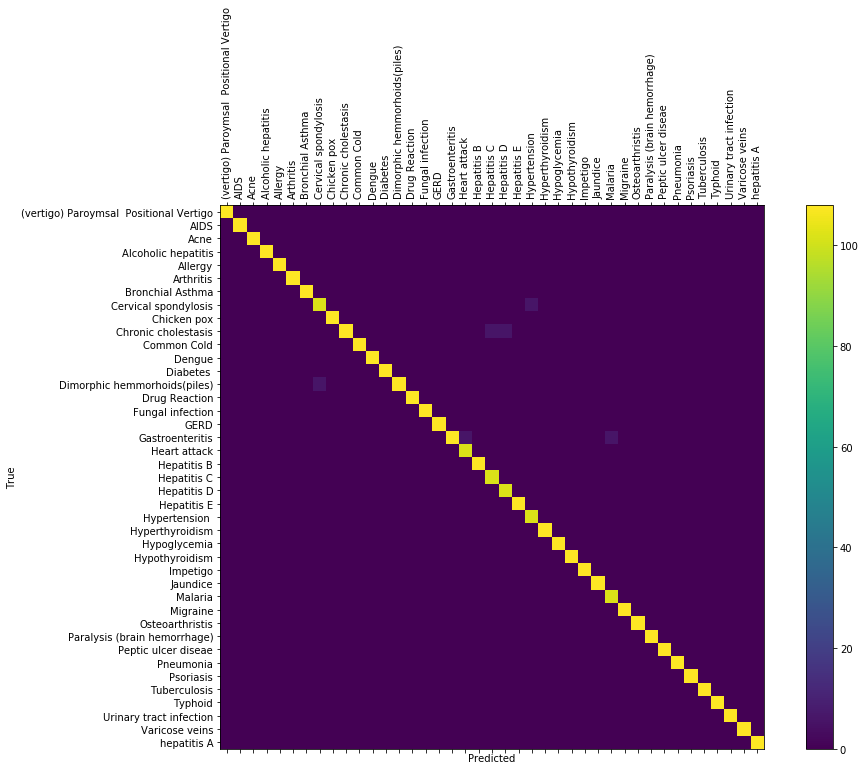

In [43]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot()
cax = ax.matshow(cnf_matrix)
fig.colorbar(cax)
tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=90)
plt.yticks(tick_marks, target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()